In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Chocolate Sales (2).csv")
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [3]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [4]:
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)
df["Amount"].head()

0     5320.0
1     7896.0
2     4501.0
3    12726.0
4    13685.0
Name: Amount, dtype: float64

In [5]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

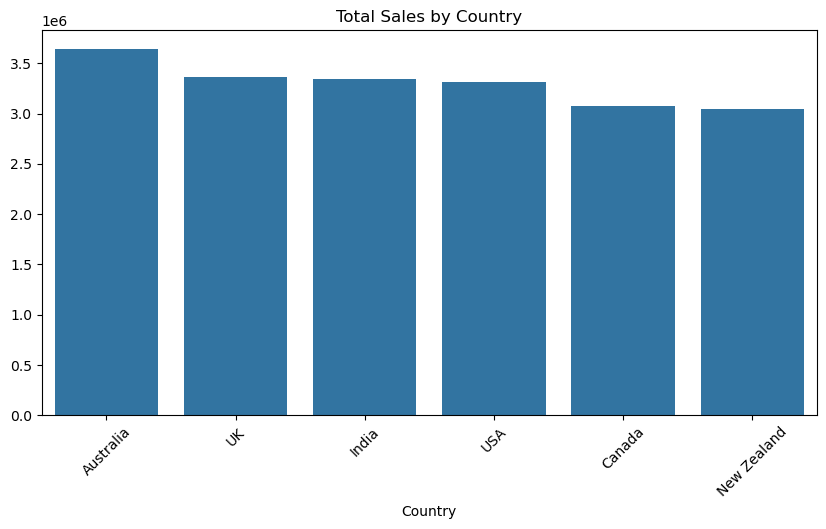

In [6]:
country_sales = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
country_sales
plt.figure(figsize=(10,5))
sns.barplot(x=country_sales.index, y=country_sales.values)
plt.title('Total Sales by Country')
plt.xticks(rotation=45)
plt.show()

Тут строится наглядный график, который показывает, в каких странах общие продажи были самыми высокими

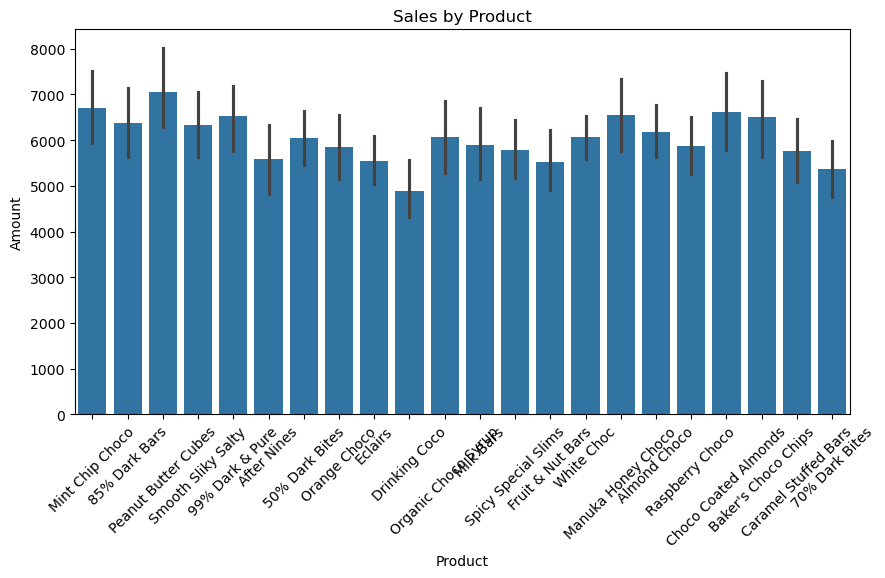

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(x='Product', y='Amount', data=df)
plt.xticks(rotation=45)
plt.title('Sales by Product')
plt.show()

График показывает, какие продукты принесли наибольшую выручку, помогая быстро оценить их популярность и вклад в общие продажи.

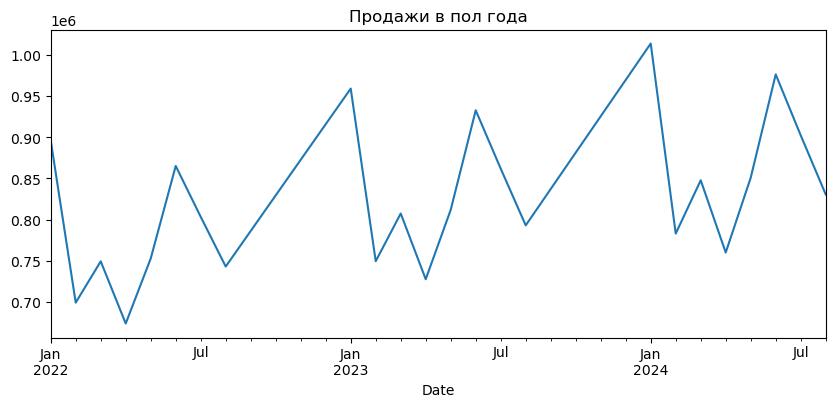

In [8]:
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()
monthly_sales.plot(figsize=(10,4), title='Продажи в пол года')
plt.show()

In [9]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Is_Weekend'] = df['Date'].dt.weekday >= 5
df['Revenue_per_Box'] = df['Amount'] / df['Boxes Shipped']


df.drop('Date', axis=1, inplace=True)

Приведение типов и создание новых столбцов в датафрейме

In [10]:
df_encoded = pd.get_dummies(
df,
columns=['Sales Person', 'Country', 'Product'],
drop_first=True
)

Приведение данных в числовой вид с помощью get_dummies

In [11]:
encoded = pd.get_dummies(df, columns=['Sales Person', 'Country', 'Product'], drop_first=True)

X = encoded.drop('Amount', axis=1)
y = encoded["Amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Размер обучающей выборки: {X_train_scaled.shape}")
print(f"Размер тестовой выборки: {X_test_scaled.shape}")

Размер обучающей выборки: (2297, 56)
Размер тестовой выборки: (985, 56)


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (2297, 56)
Размер тестовой выборки: (985, 56)


In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [14]:
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metrics = {
        'Model': model_name,
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred)
    }
    
    return metrics, y_test_pred

Этот метод обучает модель машинного обучения и оценивает её качество, рассчитывая ключевые метрики (R², RMSE, MAE) как на обучающей, так и на тестовой выборке

классическая модель регрессии (LinearRegression)

In [15]:
lr = LinearRegression()
lr_metrics, lr_pred = evaluate_model(lr, "Linear Regression", 
                                     X_train_scaled, X_test_scaled, 
                                     y_train, y_test)

классическая модель регрессии (Support Vector Regression)

In [16]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_metrics, svr_pred = evaluate_model(svr, "SVR", 
                                       X_train_scaled, X_test_scaled, 
                                       y_train, y_test)

классическая модель регрессии (Ridge Regression)

In [17]:
ridge = Ridge(alpha=1.0, random_state=42)
ridge_metrics, ridge_pred = evaluate_model(ridge, "Ridge Regression", 
                                          X_train_scaled, X_test_scaled, 
                                          y_train, y_test)

классическая модель регрессии (Lasso Regression)

In [18]:
lasso = Lasso(alpha=0.01, random_state=42)
lasso_metrics, lasso_pred = evaluate_model(lasso, "Lasso Regression", 
                                          X_train_scaled, X_test_scaled, 
                                          y_train, y_test)

классическая модель регрессии (Decision Tree Regressor)

In [19]:
dtr = DecisionTreeRegressor(max_depth=10, min_samples_split=5, 
                            min_samples_leaf=2, random_state=42)
dtr_metrics, dtr_pred = evaluate_model(dtr, "Decision Tree", 
                                       X_train, X_test, 
                                       y_train, y_test)

ансамблевая модель для регрессии (Gradient Boosting Regressor)

In [20]:
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
gbr_metrics, gbr_pred = evaluate_model(gbr, "Gradient Boosting", 
                                       X_train, X_test, 
                                       y_train, y_test)


ансамблевая модель для регрессии (Random Forest Regressor)

In [21]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf_metrics, rf_pred = evaluate_model(rf, "Random Forest", 
                                     X_train, X_test, 
                                     y_train, y_test)

ансамблевая модель для регрессии (XGBoost Regressor)

In [22]:
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_metrics, xgb_pred = evaluate_model(xgb_model, "XGBoost", 
                                       X_train, X_test, 
                                       y_train, y_test)

ансамблевая модель для регрессии (GradientBoostingRegressor)

In [23]:
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
gbr_metrics, gbr_pred = evaluate_model(gbr, "Gradient Boosting", 
                                       X_train, X_test, 
                                       y_train, y_test)


ансамблевая модель для регрессии (VotingRegressor)

In [24]:
voting_reg = VotingRegressor(
    estimators=[
        ('lr', LinearRegression()),
        ('ridge', Ridge(alpha=1.0, random_state=42)),
        ('rf', RandomForestRegressor(n_estimators=50, 
                                     max_depth=10, 
                                     random_state=42))
    ]
)
voting_metrics, voting_pred = evaluate_model(voting_reg, "Voting Regressor", 
                                            X_train_scaled, X_test_scaled, 
                                            y_train, y_test)

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

НЕЙРОСЕТЕВАЯ МОДЕЛЬ (ИИ) ДЛЯ РЕГРЕССИИ

In [27]:
def create_deep_nn(X_train, X_test, y_train, y_test, model_name="Deep Neural Network"):
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0005),
        loss='mse',
        metrics=['mae', 'mse']
    )
    
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )
    
    print(f"Обучение {model_name}...")
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )
    
    y_train_pred = model.predict(X_train, verbose=0).flatten()
    y_test_pred = model.predict(X_test, verbose=0).flatten()
    
    metrics = {
        'Model': model_name,
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred)
    }
    
    return metrics, y_test_pred, history, model

Эта функция создаёт, обучает и оценивает глубокую нейронную сеть для задачи регрессии. Она строит многослойную архитектуру, обучает её с контролем переобучения и возвращает метрики качества, прогнозы, историю обучения и саму модель для анализа результатов

Deep Neural Network - нейросетевая (ИИ) модель для регрессии

In [28]:
deep_nn_metrics, deep_nn_pred, deep_nn_history, deep_nn_model = create_deep_nn(
    X_train_scaled, X_test_scaled, y_train, y_test,
    "Deep Neural Network"
)

Обучение Deep Neural Network...
Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 56279244.0000 - mae: 6056.1504 - mse: 56279244.0000 - val_loss: 62329432.0000 - val_mae: 6375.9761 - val_mse: 62329432.0000
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56217100.0000 - mae: 6051.2334 - mse: 56217100.0000 - val_loss: 62270740.0000 - val_mae: 6371.6650 - val_mse: 62270740.0000
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56056896.0000 - mae: 6039.2627 - mse: 56056896.0000 - val_loss: 62007820.0000 - val_mae: 6353.9556 - val_mse: 62007820.0000
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55312280.0000 - mae: 5989.0366 - mse: 55312280.0000 - val_loss: 60181940.0000 - val_mae: 6238.6094 - val_mse: 60181940.0000
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51701736.0000 - mae: 5742.4736 - mse: 51701736.0000 - val_loss: 52911484.0000 - val_mae: 5754.1719 - val_mse: 52911484.0000
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

In [29]:
nn_models_df = pd.DataFrame([deep_nn_metrics])

создаем датафрейм с метриками качества

In [38]:
classical_models_metrics = [lr_metrics, ridge_metrics, lasso_metrics, 
                            svr_metrics, dtr_metrics]
classical_models_df = pd.DataFrame(classical_models_metrics)

In [46]:
ensemble_models_metrics = [rf_metrics, gbr_metrics, xgb_metrics, voting_metrics]
ensemble_models_df = pd.DataFrame(ensemble_models_metrics)

То же самое происходит и тут но с метриками других моделей

In [48]:
classical_models_metrics = [lr_metrics, ridge_metrics, lasso_metrics, 
                            svr_metrics, dtr_metrics]
classical_models_df = pd.DataFrame(classical_models_metrics)

и тут

In [50]:
all_metrics_df = pd.concat([classical_models_df, ensemble_models_df], 
                           ignore_index=True)
all_metrics_df = all_metrics_df.sort_values('Test R2', ascending=False)

Этот код объединяет результаты классических и ансамблевых моделей в одну таблицу и сортирует их по качеству предсказаний R2

In [52]:
print(nn_models_df.round(4))

all_metrics_df = pd.concat([classical_models_df, ensemble_models_df, nn_models_df], 
                           ignore_index=True)
all_metrics_df = all_metrics_df.sort_values('Test R2', ascending=False)

print(all_metrics_df.round(4))

                 Model  Train R2  Test R2  Train RMSE  Test RMSE  Train MAE  \
0  Deep Neural Network    0.9087   0.7252   1352.5712  2194.6769   899.8066   

    Test MAE  
0  1471.0405  
                 Model  Train R2  Test R2  Train RMSE  Test RMSE  Train MAE  \
6    Gradient Boosting    0.9983   0.9935    182.3894   338.7775   131.7883   
5        Random Forest    0.9967   0.9924    258.9215   364.4733   110.2571   
7              XGBoost    0.9980   0.9865    201.1217   485.9955   145.5332   
4        Decision Tree    0.9824   0.9639    593.0882   795.4095   280.5315   
9  Deep Neural Network    0.9087   0.7252   1352.5712  2194.6769   899.8066   
8     Voting Regressor    0.5974   0.5466   2840.0491  2819.1184  2245.8243   
1     Ridge Regression    0.1171   0.0184   4205.8160  4147.8778  3338.4371   
2     Lasso Regression    0.1171   0.0184   4205.8158  4148.0360  3338.3934   
0    Linear Regression    0.1171   0.0184   4205.8158  4148.0451  3338.3944   
3                  SV

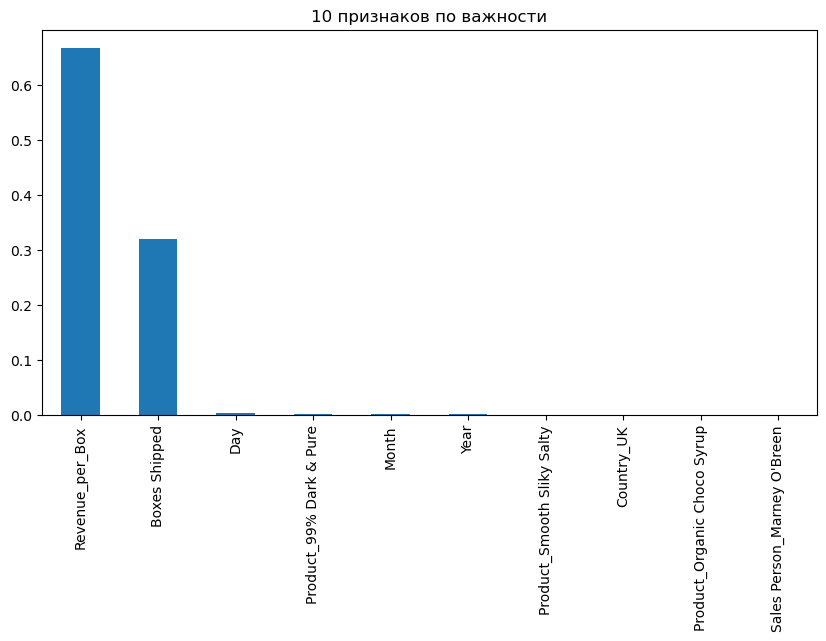

In [78]:
importances = pd.Series(
rf.feature_importances_,
index=X.columns
).sort_values(ascending=False)


importances.head(10)
plt.figure(figsize=(10,5))
importances.head(10).plot(kind='bar')
plt.title('10 признаков по важности')
plt.show()

                 Model  Train R2  Test R2  Train RMSE  Test RMSE  Train MAE  \
6    Gradient Boosting    0.9983   0.9935    182.3894   338.7775   131.7883   
5        Random Forest    0.9967   0.9924    258.9215   364.4733   110.2571   
7              XGBoost    0.9980   0.9865    201.1217   485.9955   145.5332   
4        Decision Tree    0.9824   0.9639    593.0882   795.4095   280.5315   
9  Deep Neural Network    0.9087   0.7252   1352.5712  2194.6769   899.8066   
8     Voting Regressor    0.5974   0.5466   2840.0491  2819.1184  2245.8243   
1     Ridge Regression    0.1171   0.0184   4205.8160  4147.8778  3338.4371   
2     Lasso Regression    0.1171   0.0184   4205.8158  4148.0360  3338.3934   
0    Linear Regression    0.1171   0.0184   4205.8158  4148.0451  3338.3944   
3                  SVR    0.0304   0.0167   4407.4921  4151.5007  3344.2576   

    Test MAE  
6   230.3973  
5   187.2210  
7   292.3593  
4   469.3755  
9  1471.0405  
8  2238.3011  
1  3313.9476  
2  3313.94

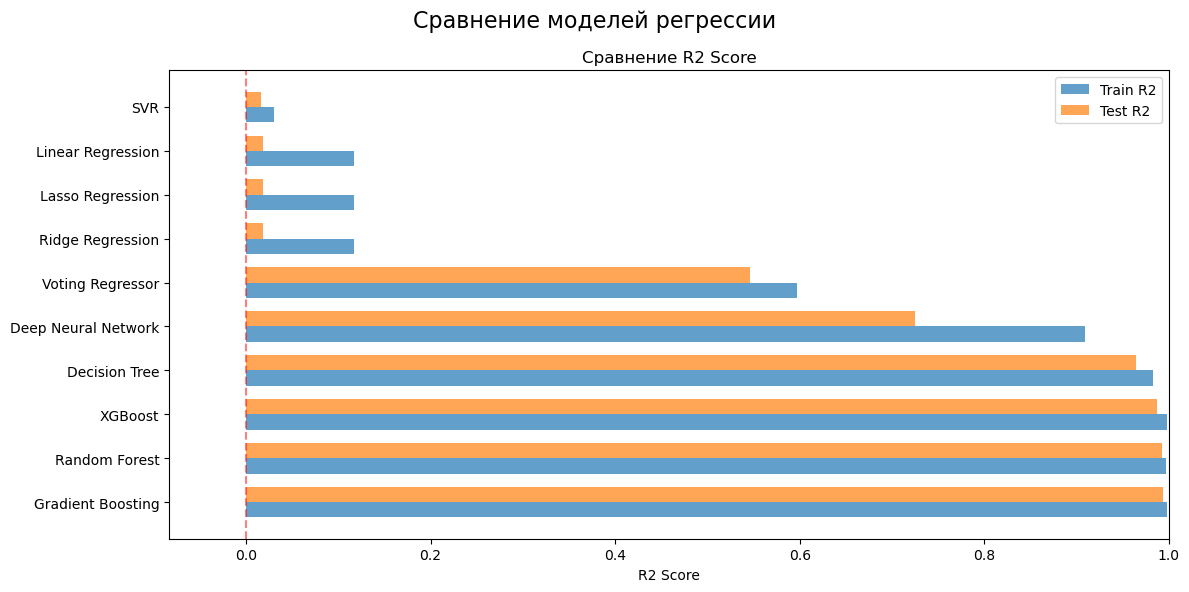

In [54]:
print(all_metrics_df.round(4))

fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('Сравнение моделей регрессии', fontsize=16)

models = all_metrics_df['Model'].tolist()
test_r2 = all_metrics_df['Test R2'].tolist()
train_r2 = all_metrics_df['Train R2'].tolist()

x_pos = np.arange(len(models))
width = 0.35

bars1 = ax.barh(x_pos - width/2, train_r2, width, label='Train R2', alpha=0.7)
bars2 = ax.barh(x_pos + width/2, test_r2, width, label='Test R2', alpha=0.7)
ax.set_yticks(x_pos)
ax.set_yticklabels(models)
ax.set_xlabel('R2 Score')
ax.set_title('Сравнение R2 Score')
ax.legend()
ax.axvline(x=0, color='r', linestyle='--', alpha=0.5)
ax.set_xlim([min(min(train_r2), min(test_r2)) - 0.1, 1])

plt.tight_layout()
plt.show()

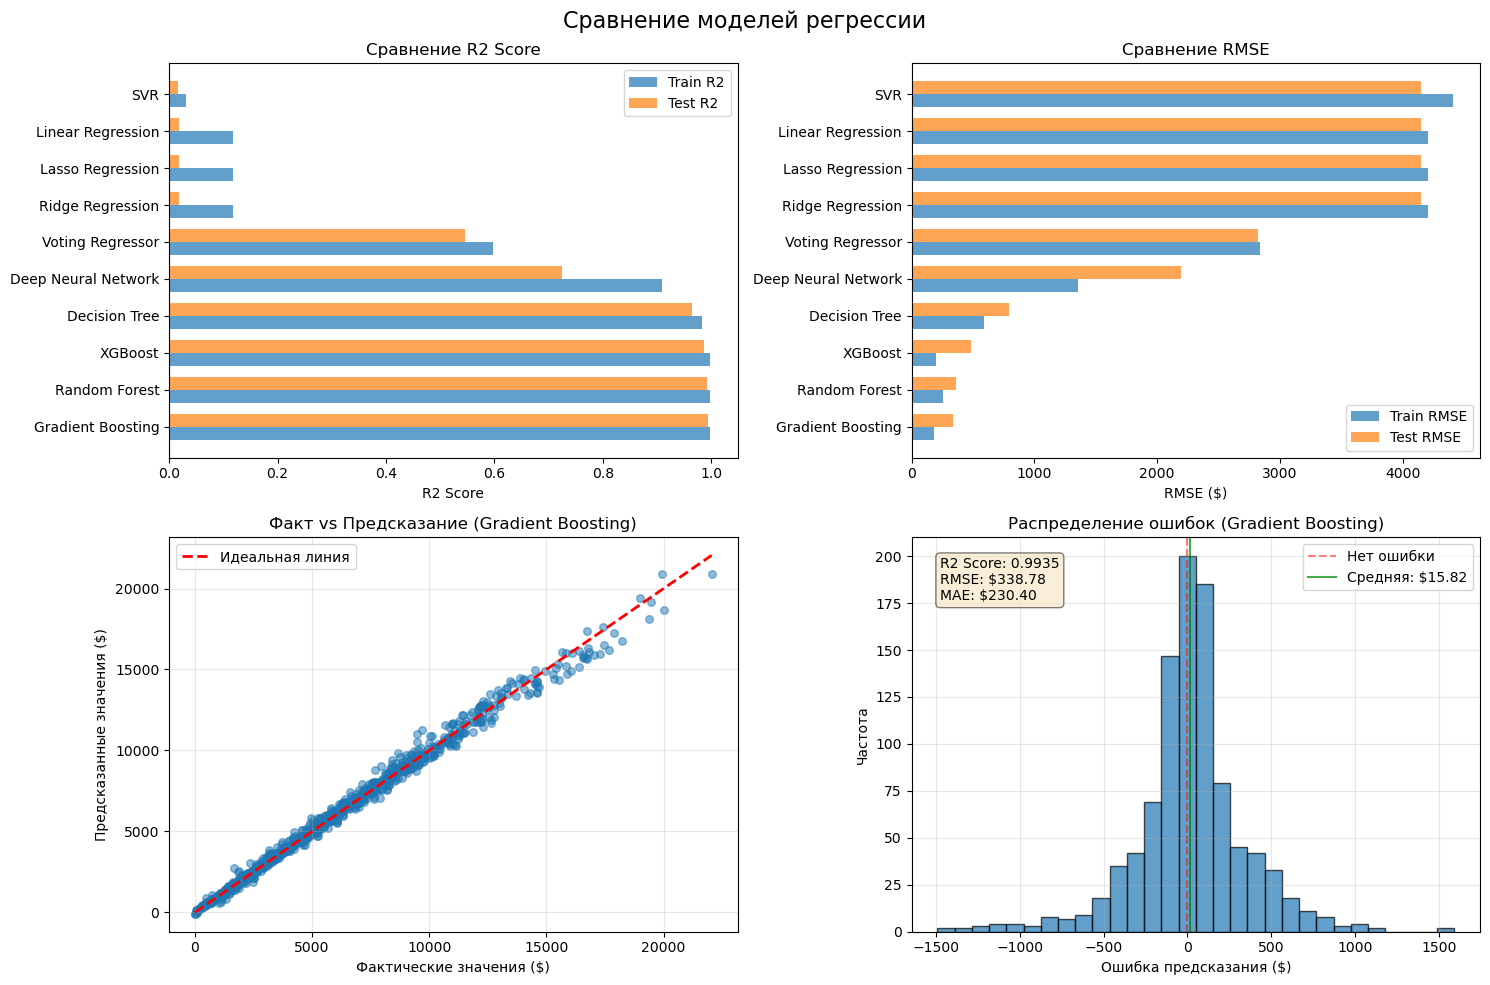

In [56]:
best_model_name = all_metrics_df.iloc[0]['Model']
best_model_pred = None

models_dict = {
    'Linear Regression': lr_pred,
    'Ridge Regression': ridge_pred,
    'Lasso Regression': lasso_pred,
    'SVR': svr_pred,
    'Decision Tree': dtr_pred,
    'Random Forest': rf_pred,
    'Gradient Boosting': gbr_pred,
    'XGBoost': xgb_pred,
    'Voting Regressor': voting_pred
}

if best_model_name in models_dict:
    best_model_pred = models_dict[best_model_name]
else:
    best_model_name = all_metrics_df.iloc[0]['Model']
    best_model_pred = models_dict.get(best_model_name, lr_pred)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Сравнение моделей регрессии', fontsize=16)

models = all_metrics_df['Model'].tolist()
test_r2 = all_metrics_df['Test R2'].tolist()
train_r2 = all_metrics_df['Train R2'].tolist()

x_pos = np.arange(len(models))
width = 0.35

bars1 = axes[0, 0].barh(x_pos - width/2, train_r2, width, label='Train R2', alpha=0.7)
bars2 = axes[0, 0].barh(x_pos + width/2, test_r2, width, label='Test R2', alpha=0.7)
axes[0, 0].set_yticks(x_pos)
axes[0, 0].set_yticklabels(models)
axes[0, 0].set_xlabel('R2 Score')
axes[0, 0].set_title('Сравнение R2 Score')
axes[0, 0].legend()
axes[0, 0].axvline(x=0, color='r', linestyle='--', alpha=0.5)

test_rmse = all_metrics_df['Test RMSE'].tolist()
train_rmse = all_metrics_df['Train RMSE'].tolist()

bars1 = axes[0, 1].barh(x_pos - width/2, train_rmse, width, label='Train RMSE', alpha=0.7)
bars2 = axes[0, 1].barh(x_pos + width/2, test_rmse, width, label='Test RMSE', alpha=0.7)
axes[0, 1].set_yticks(x_pos)
axes[0, 1].set_yticklabels(models)
axes[0, 1].set_xlabel('RMSE ($)')
axes[0, 1].set_title('Сравнение RMSE')
axes[0, 1].legend()

axes[1, 0].scatter(y_test, best_model_pred, alpha=0.5, s=30)
axes[1, 0].plot([y_test.min(), y_test.max()], 
                [y_test.min(), y_test.max()], 
                'r--', lw=2, label='Идеальная линия')
axes[1, 0].set_xlabel('Фактические значения ($)')
axes[1, 0].set_ylabel('Предсказанные значения ($)')
axes[1, 0].set_title(f'Факт vs Предсказание ({best_model_name})')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

errors = best_model_pred - y_test
axes[1, 1].hist(errors, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Ошибка предсказания ($)')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].set_title(f'Распределение ошибок ({best_model_name})')
axes[1, 1].axvline(x=0, color='r', linestyle='--', alpha=0.5, label='Нет ошибки')
axes[1, 1].axvline(x=errors.mean(), color='g', linestyle='-', alpha=0.7, 
                   label=f'Средняя: ${errors.mean():.2f}')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

best_metrics = all_metrics_df[all_metrics_df['Model'] == best_model_name].iloc[0]
metrics_text = (f"R2 Score: {best_metrics['Test R2']:.4f}\n"
                f"RMSE: ${best_metrics['Test RMSE']:.2f}\n"
                f"MAE: ${best_metrics['Test MAE']:.2f}")

axes[1, 1].text(0.05, 0.95, metrics_text, transform=axes[1, 1].transAxes,
                fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

Этот код создаёт сводную панель визуализации для сравнения всех обученных моделей и анализа лучшей из них. На четырёх графиках отображаются ключевые метрики R² и RMSE для всех алгоритмов, а также проверяется качество предсказаний лучшей модели через диаграмму рассеяния и распределение ошибок.

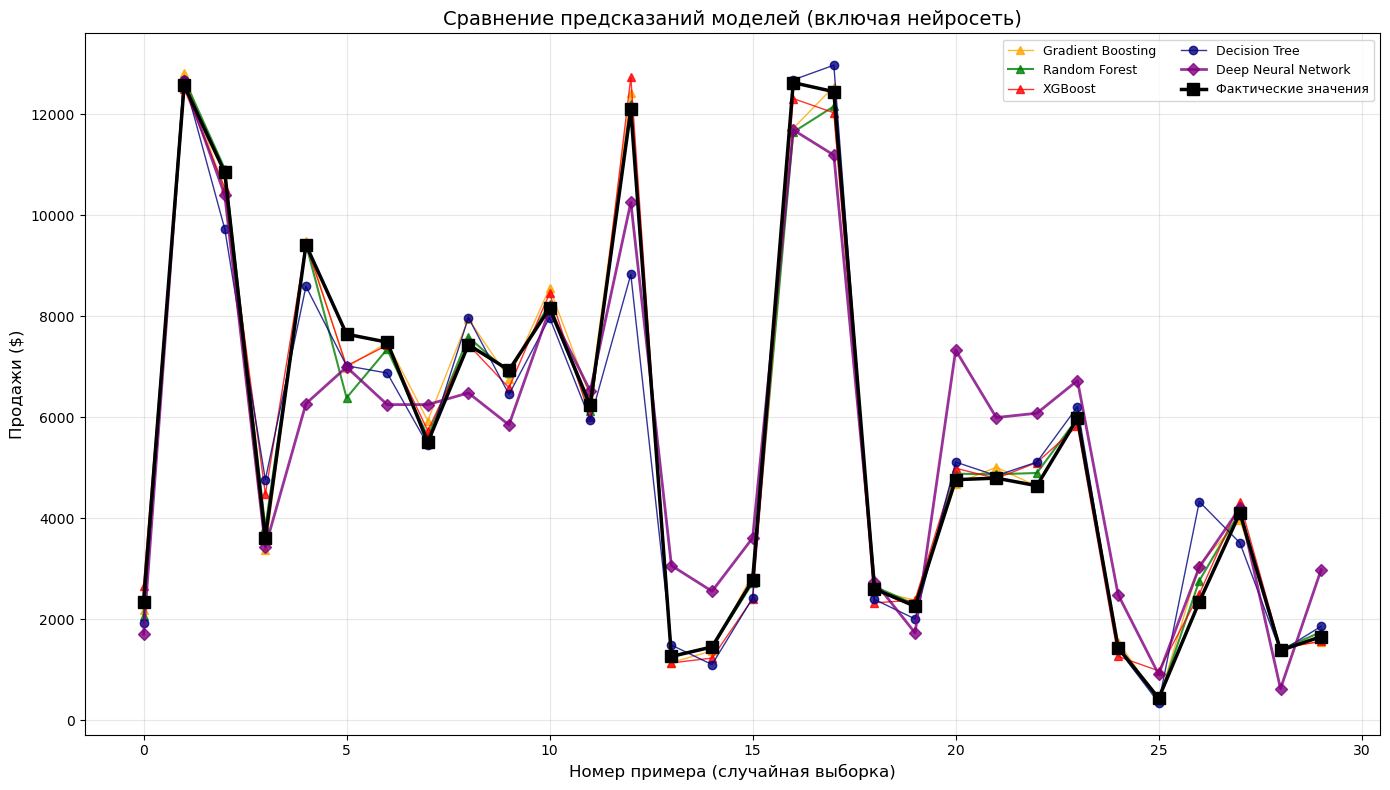

In [76]:
plt.figure(figsize=(14, 8))
sample_indices = np.random.choice(len(y_test), min(30, len(y_test)), replace=False)

if 'Deep Neural Network' not in models_dict:
    models_dict['Deep Neural Network'] = deep_nn_pred

sorted_models = sorted(models_dict.items(), 
                      key=lambda x: r2_score(y_test, x[1]), 
                      reverse=True)

top_models = sorted_models[:5]
if 'Deep Neural Network' not in [m[0] for m in top_models]:
    top_models = top_models[:4] + [('Deep Neural Network', deep_nn_pred)]

model_colors = {
    'Deep Neural Network': 'purple',
    'Random Forest': 'green',
    'Gradient Boosting': 'orange',
    'XGBoost': 'red',
    'Linear Regression': 'steelblue',
    'Ridge Regression': 'cornflowerblue',
    'Lasso Regression': 'lightblue',
    'SVR': 'cyan',
    'Decision Tree': 'navy',
    'Voting Regressor': 'magenta'
}

model_markers = {
    'Deep Neural Network': 'D',
    'Random Forest': '^',
    'Gradient Boosting': '^',
    'XGBoost': '^',
    'Linear Regression': 'o',
    'Ridge Regression': 'o',
    'Lasso Regression': 'o',
    'SVR': 'o',
    'Decision Tree': 'o',
    'Voting Regressor': 'v'
}

for model_name, pred_values in top_models:
    color = model_colors.get(model_name, 'gray')
    marker = model_markers.get(model_name, 'o')
    linewidth = 2 if 'Neural' in model_name else 1.5 if 'Random Forest' in model_name else 1
    
    plt.plot(range(len(sample_indices)), 
             [pred_values[idx] for idx in sample_indices],
             marker=marker, markersize=6, linewidth=linewidth, 
             alpha=0.8, label=model_name, color=color)

plt.plot(range(len(sample_indices)), 
         [y_test.iloc[idx] for idx in sample_indices],
         marker='s', markersize=8, linewidth=2.5, 
         color='black', label='Фактические значения')

plt.xlabel('Номер примера (случайная выборка)', fontsize=12)
plt.ylabel('Продажи ($)', fontsize=12)
plt.title('Сравнение предсказаний моделей (включая нейросеть)', fontsize=14)

plt.legend(loc='best', fontsize=9, ncol=2)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

график для прямого сравнения предсказаний лучших моделей с реальными значениями на случайной выборке из 30 примеров

# Вывод

В результате проведенной работы, я понял что сложные модели, такие как ансамблевые или ИИ модели не всегда лучше обычных, возможно это из за малой выборки, но по данной работе видно что обычные модели справляются намного лучше, и большинство из них можно использовать и принимать предсказания за действительность с высокой долей вероятности.